In [1]:
# installation: 
! pip install lyricsgenius
! pip install pandas
! pip install regex
! pip install matplotlib
! pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer

In [3]:
# file paths
root = '/'
kaggleDataset = root + 'datasets/kaggleData/'
geniusDataset = root + 'datasets/geniusClean/'


In [4]:
# make a function out of the above code with the file path as input
def createDfFromFiles(path):
    # make the path from current directory and the input path
    pathComp = os.getcwd() + path

    # create a tuple from files in kaggle dataset with the file name and the file content, with latin-1 encoding
    files = [(file, open(pathComp + file, 'r', encoding='latin-1').read()) for file in os.listdir(pathComp)]

    # delete all .txt from filename
    files = [(file.replace('.txt', ''), content) for file, content in files]

    # delete all Lyrics_ from filename
    files = [(file.replace('Lyrics_', ''), content) for file, content in files]

    # replace all \n with space
    files = [(file, content.replace('\n', ' ')) for file, content in files]

    # replace all double spaces with single space
    files = [(file, content.replace('  ', ' ')) for file, content in files]

    # delete all spaces at the beginning of the string
    files = [(file, content.lstrip()) for file, content in files]

    # create a dataframe from the tuple
    df = pd.DataFrame(files, columns=['artist', 'lyrics'])

    return df

kaggle_df = createDfFromFiles(kaggleDataset)
genius_df = createDfFromFiles(geniusDataset)

In [5]:
# add number of words to the dataframe
kaggle_df['num_words'] = kaggle_df['lyrics'].apply(lambda x: len(x.split()))
genius_df['num_words'] = genius_df['lyrics'].apply(lambda x: len(x.split()))

In [6]:
print(kaggle_df.shape)
kaggle_df.head()


(49, 3)


,artist,lyrics,num_words
0,adele,Looking for some education Made my way into th...,18978
1,al-green,"Let's stay together I, I'm I'm so in love with...",16637
2,alicia-keys,Ooh....... New York x2 Grew up in a town that ...,23241
3,amy-winehouse,Build your dreams to the stars above But when ...,15604
4,beatles,"Yesterday, all my troubles seemed so far away ...",14340


In [7]:
print(genius_df.shape)
genius_df.head()

(48, 3)


,artist,lyrics,num_words
0,AndyWilliams,Moon River LyricsMoon river wider than a mile ...,3212
1,BadBunnyABRA,TranslationsEnglishDeutschSORRY PAPI Lyrics E...,358
2,BadBunnyDaddyYankee,TranslationsDeutschFranaisEnglishLa Santa Lyri...,533
3,BadBunnyDonOmar,TranslationsEnglishDeutschPA ROMPERLA Lyrics ...,454
4,BadBunnyJhayCortez,TranslationsTrkePortugusDeutschEnglishDKITI Ly...,1925


In [8]:
kaggle_df['num_words'].describe()

count       49.000000
mean     27504.102041
std      14472.807904
min       6343.000000
25%      16637.000000
50%      23241.000000
75%      38203.000000
max      64483.000000
Name: num_words, dtype: float64

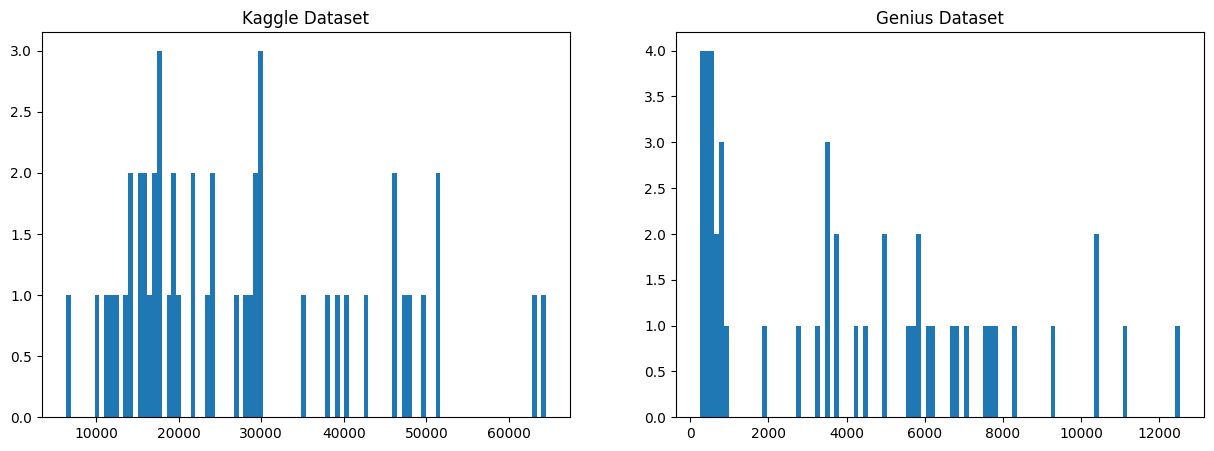

In [9]:
# plot frequency distribution of number of words for genius_df and kaggle_df dataset in seperate plots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(kaggle_df['num_words'], bins=100)
ax[0].set_title('Kaggle Dataset')
ax[1].hist(genius_df['num_words'], bins=100)
ax[1].set_title('Genius Dataset')
plt.show()


In [10]:
# get 10 most used words in lyrics from df
def getMostUsedWords(df, n):
    # get all words from lyrics
    words = ' '.join(df['lyrics']).split()

    # create a dictionary with the words as keys and the number of times it appears as value
    wordsDict = {word: words.count(word) for word in words}

    # sort the dictionary by the values
    wordsDict = {k: v for k, v in sorted(wordsDict.items(), key=lambda item: item[1], reverse=True)}

    # get the first n words from the dictionary
    words = list(wordsDict.keys())[:n]

    # get the first n values from the dictionary
    values = list(wordsDict.values())[:n]

    # return the words and values
    return words, values




In [11]:
#kaggle_mostUsedWords = getMostUsedWords(kaggle_df, 30)
#genius_mostUsedWords = getMostUsedWords(genius_df, 30)

#print(kaggle_mostUsedWords)
#print(genius_mostUsedWords)

### Merge Lyrics Datasets

In [12]:
# merge lyrics from genius_df and kaggle_df
lyrics_df = pd.concat([kaggle_df, genius_df], ignore_index=True)
lyrics_df.head()

,artist,lyrics,num_words
0,adele,Looking for some education Made my way into th...,18978
1,al-green,"Let's stay together I, I'm I'm so in love with...",16637
2,alicia-keys,Ooh....... New York x2 Grew up in a town that ...,23241
3,amy-winehouse,Build your dreams to the stars above But when ...,15604
4,beatles,"Yesterday, all my troubles seemed so far away ...",14340


In [13]:
lyrics_df.describe()

,num_words
count,97.000000
mean,15903.463918
std,15791.908510
min,250.000000
25%,3690.000000
50%,11102.000000
75%,23241.000000
max,64483.000000


## Tokenization

In [14]:
# define Toekeizer
kerasTokenizer = Tokenizer()

# fit the tokenizer on the lyrics
kerasTokenizer.fit_on_texts(lyrics_df['lyrics'].astype(str).str.lower())

num_words = len(kerasTokenizer.word_index) + 1
print(num_words)

tokenSentences = kerasTokenizer.texts_to_sequences(lyrics_df['lyrics'].astype(str).str.lower())

#print(tokenSentences[0])

37428


In [15]:
# sequence into n-grams
input_seq = list()

for i in tokenSentences:
    for j in range(1, len(i)):
        n_gram_sequence = i[:j+1]
        input_seq.append(n_gram_sequence)

